In [4]:
import tensorflow as tf

x=tf.constant([1.0,2.0,3.0,4.0,5.0])
y=tf.constant([1.0,3.0,3.0,2.0,5.0])

print('Elements in array x')
with tf.name_scope ("ElementsOfArray_X"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            output = sess.run(x[i])
            print(output)
    
print('Elements in array y')
with tf.name_scope ("ElementsOfArray_Y"):
    with tf.Session() as sess:
        for i in range(len(sess.run(y))):
            output1 = sess.run(y[i])
            print(output1)

Elements in array x
1.0
2.0
3.0
4.0
5.0
Elements in array y
1.0
3.0
3.0
2.0
5.0


In [5]:
sum1=tf.constant(0)

with tf.name_scope("Mean_X"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            output =sess.run(x[i])
            sum1=tf.add(sum1,output, name="AddX")
        a=tf.divide(sum1,len(sess.run(x)), name="DivideByN")
        avgx=sess.run(a)
    print('Mean of x')
    print(avgx)

sum1=tf.constant(0)
with tf.name_scope("Mean_Y"):
    with tf.Session() as sess:
        for i in range(len(sess.run(y))):
            output =sess.run(y[i])
            sum1=tf.add(sum1,output, name="AddY")
        a=tf.divide(sum1,len(sess.run(y)), name="DivideByN")
        avgy=sess.run(a)
    print('Mean of y')
    print(avgy)


Mean of x
3.0
Mean of y
2.8


In [6]:
#Calculate variance for x
var=tf.constant(0.0)
with tf.name_scope("Calculate_Variance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(sess.run(x[i]), avgx, name="Sub")
            b=tf.square(a, name="Squaring")
            var=tf.add(var,b, name="Add")
        vari=sess.run(var)
print('Variance of x')
print(vari)

Variance of x
10.0


In [7]:
#Calculate covariance of x & y
cov=tf.constant(0.0)
with tf.name_scope("Calculate_Covariance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(sess.run(x[i]),avgx, name="Subtract1")
            b=tf.subtract(sess.run(y[i]),avgy, name="Subtract2")
            c=tf.multiply(a,b,name="Multiply")
            cov=tf.add(cov,c, name="AddThem")
        covar=sess.run(cov)
print('Covariance of x,y')
print(covar)

Covariance of x,y
7.0


In [8]:
#Calculate value of c

with tf.name_scope("Calculate_c"):
    with tf.Session() as sess:
        temp=tf.divide(cov,var)
        const_c=sess.run(temp)
        print('Value of c')
print(const_c)

Value of c
0.7


In [9]:
#Calculate value of m 
with tf.name_scope("Calculate_slope"):
    c=tf.to_float(const_c)
    d=tf.to_float(avgx)
    e=tf.multiply(c,d)
    f=tf.to_float(avgy)
    slope=tf.subtract(f,e)
    with tf.Session() as sess:
        slope=sess.run(f)
print('The value of m')
print(slope)

The value of m
2.8


Part 1

// for Trial - dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

    Start with 0 (zero ) value for m & c .
    Using cost function $$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$ where $(h_\theta(x^{(i)})$ is prediction for present iteration

$$\theta_1(t+1) = \theta_1(t) - learning\_rate * cost(t) * x(t)$$
$$\theta_0(t+1) = \theta_0(t) - learning\_rate * cost(t) $$


    Find the values of $\theta_1$ & $\theta_0$ by updating the values with learning rate of 0.005, 0.0005 etc and epoch value 100,500,1000
    Stop the iterations when error falls below threshold

In [13]:
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [10]:
##parameters
learning_rate = 0.005
training_epochs = 100
display_step = 50

In [14]:
# Training Data
train_X = numpy.asarray([1.0,2.0,3.0,4.0,5.0])
train_Y = numpy.asarray([1.0,3.0,3.0,2.0,5.0])
n_samples = train_X.shape[0]

In [15]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [16]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [17]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [18]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.979100525 W= 1.36639 b= -1.83773
Epoch: 0100 cost= 0.924763322 W= 1.36622 b= -1.72507
Optimization Finished!
Training cost= 0.924763 W= 1.36622 b= -1.72507 



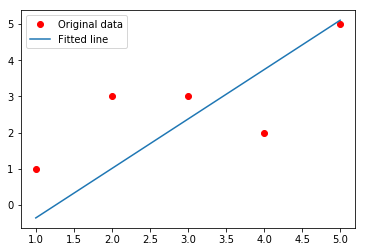

In [19]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

Epoch: 0050 cost= 0.410109907 W= 0.646063 b= 0.676336
Epoch: 0100 cost= 0.390029341 W= 0.700311 b= 0.691419
Epoch: 0150 cost= 0.390010178 W= 0.703053 b= 0.692174
Epoch: 0200 cost= 0.390011758 W= 0.703193 b= 0.692206
Optimization Finished!
Training cost= 0.390012 W= 0.703193 b= 0.692206 



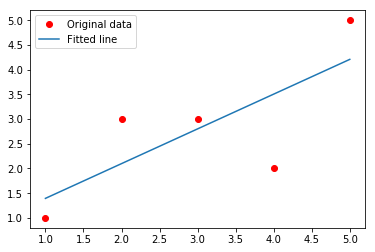

In [20]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.005
training_epochs = 200
display_step = 50

# Training Data
train_X = numpy.asarray([1.0,2.0,3.0,4.0,5.0])
train_Y = numpy.asarray([1.0,3.0,3.0,2.0,5.0])
n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Initializing the variables
init = tf.global_variables_initializer()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


Epoch: 0050 cost= 0.416690439 W= 0.860365 b= 0.174779
Epoch: 0100 cost= 0.413437456 W= 0.841281 b= 0.192764
Epoch: 0150 cost= 0.411558807 W= 0.834915 b= 0.213319
Epoch: 0200 cost= 0.409834474 W= 0.829415 b= 0.233189
Epoch: 0250 cost= 0.408249378 W= 0.824174 b= 0.252243
Epoch: 0300 cost= 0.406791985 W= 0.819153 b= 0.270505
Epoch: 0350 cost= 0.405452102 W= 0.814339 b= 0.28801
Epoch: 0400 cost= 0.404220104 W= 0.809727 b= 0.304788
Epoch: 0450 cost= 0.403087318 W= 0.805305 b= 0.320868
Epoch: 0500 cost= 0.402045667 W= 0.801067 b= 0.336281
Optimization Finished!
Training cost= 0.402046 W= 0.801067 b= 0.336281 



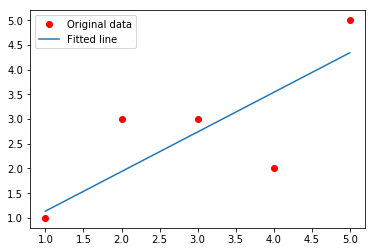

In [21]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.005
training_epochs = 500
display_step = 50

# Training Data
train_X = numpy.asarray([1.0,2.0,3.0,4.0,5.0])
train_Y = numpy.asarray([1.0,3.0,3.0,2.0,5.0])
n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Initializing the variables
init = tf.global_variables_initializer()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


Epoch: 0050 cost= 0.460545212 W= 0.445084 b= 1.35927
Epoch: 0100 cost= 0.428397477 W= 0.518809 b= 1.34909
Epoch: 0150 cost= 0.425251573 W= 0.52965 b= 1.3227
Epoch: 0200 cost= 0.422352970 W= 0.53702 b= 1.29655
Epoch: 0250 cost= 0.419687748 W= 0.543929 b= 1.27146
Epoch: 0300 cost= 0.417240620 W= 0.550545 b= 1.2474
Epoch: 0350 cost= 0.414993763 W= 0.556886 b= 1.22434
Epoch: 0400 cost= 0.412931144 W= 0.562963 b= 1.20224
Epoch: 0450 cost= 0.411037385 W= 0.568788 b= 1.18105
Epoch: 0500 cost= 0.409298897 W= 0.574371 b= 1.16075
Epoch: 0550 cost= 0.407702923 W= 0.579722 b= 1.14128
Epoch: 0600 cost= 0.406238079 W= 0.584851 b= 1.12263
Epoch: 0650 cost= 0.404893249 W= 0.589767 b= 1.10475
Epoch: 0700 cost= 0.403659016 W= 0.594479 b= 1.08762
Optimization Finished!
Training cost= 0.403659 W= 0.594479 b= 1.08762 



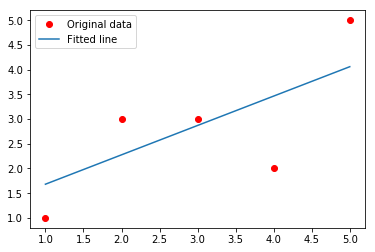

In [22]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.005
training_epochs = 700
display_step = 50

# Training Data
train_X = numpy.asarray([1.0,2.0,3.0,4.0,5.0])
train_Y = numpy.asarray([1.0,3.0,3.0,2.0,5.0])
n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Initializing the variables
init = tf.global_variables_initializer()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


Epoch: 0050 cost= 0.484332234 W= 0.858698 b= -0.147973
Epoch: 0100 cost= 0.447515965 W= 0.915939 b= -0.0953727
Epoch: 0150 cost= 0.442791700 W= 0.910326 b= -0.0617808
Epoch: 0200 cost= 0.438542545 W= 0.901889 b= -0.0304336
Epoch: 0250 cost= 0.434638172 W= 0.893649 b= -0.000431071
Epoch: 0300 cost= 0.431049585 W= 0.885743 b= 0.0283235
Epoch: 0350 cost= 0.427751154 W= 0.878165 b= 0.0558838
Epoch: 0400 cost= 0.424719334 W= 0.870902 b= 0.0823
Epoch: 0450 cost= 0.421932459 W= 0.86394 b= 0.107619
Epoch: 0500 cost= 0.419370949 W= 0.857267 b= 0.131887
Epoch: 0550 cost= 0.417016208 W= 0.850872 b= 0.155147
Epoch: 0600 cost= 0.414851487 W= 0.844741 b= 0.177441
Epoch: 0650 cost= 0.412861645 W= 0.838866 b= 0.19881
Epoch: 0700 cost= 0.411032349 W= 0.833234 b= 0.219291
Epoch: 0750 cost= 0.409350634 W= 0.827837 b= 0.238922
Epoch: 0800 cost= 0.407804430 W= 0.822663 b= 0.257738
Epoch: 0850 cost= 0.406382948 W= 0.817704 b= 0.275772
Epoch: 0900 cost= 0.405075967 W= 0.812952 b= 0.293058
Epoch: 0950 cost= 0

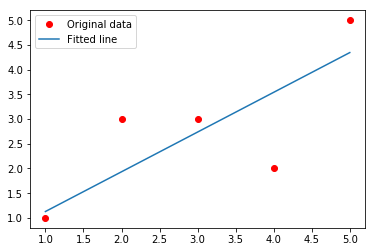

In [23]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.005
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([1.0,2.0,3.0,4.0,5.0])
train_Y = numpy.asarray([1.0,3.0,3.0,2.0,5.0])
n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Initializing the variables
init = tf.global_variables_initializer()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


Epoch: 0050 cost= 0.496123016 W= 0.588799 b= 0.600575
Epoch: 0100 cost= 0.448840052 W= 0.621764 b= 0.609995
Optimization Finished!
Training cost= 0.44884 W= 0.621764 b= 0.609995 



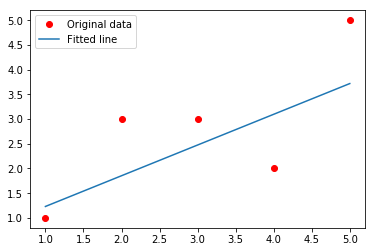

In [24]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.0005
training_epochs = 100
display_step = 50

# Training Data
train_X = numpy.asarray([1.0,2.0,3.0,4.0,5.0])
train_Y = numpy.asarray([1.0,3.0,3.0,2.0,5.0])
n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Initializing the variables
init = tf.global_variables_initializer()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


Epoch: 0050 cost= 0.598263204 W= 0.954794 b= -0.599814
Epoch: 0100 cost= 0.525731027 W= 1.03178 b= -0.521849
Epoch: 0150 cost= 0.514554977 W= 1.02256 b= -0.470214
Epoch: 0200 cost= 0.504491091 W= 1.00952 b= -0.421891
Optimization Finished!
Training cost= 0.504491 W= 1.00952 b= -0.421891 



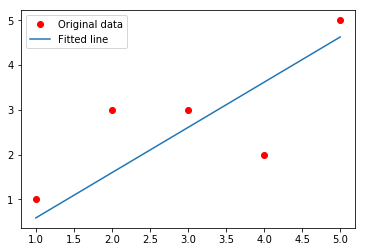

In [25]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.005
training_epochs = 200
display_step = 50

# Training Data
train_X = numpy.asarray([1.0,2.0,3.0,4.0,5.0])
train_Y = numpy.asarray([1.0,3.0,3.0,2.0,5.0])
n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Initializing the variables
init = tf.global_variables_initializer()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


Epoch: 0050 cost= 0.455519676 W= 0.451361 b= 1.53192
Epoch: 0100 cost= 0.448485464 W= 0.479491 b= 1.50196
Epoch: 0150 cost= 0.443704605 W= 0.489675 b= 1.46858
Epoch: 0200 cost= 0.439294040 W= 0.498588 b= 1.43635
Epoch: 0250 cost= 0.435242653 W= 0.507088 b= 1.40545
Epoch: 0300 cost= 0.431522757 W= 0.515233 b= 1.37582
Epoch: 0350 cost= 0.428106964 W= 0.52304 b= 1.34743
Epoch: 0400 cost= 0.424970716 W= 0.530522 b= 1.32022
Epoch: 0450 cost= 0.422091097 W= 0.537694 b= 1.29414
Epoch: 0500 cost= 0.419447094 W= 0.544568 b= 1.26914
Optimization Finished!
Training cost= 0.419447 W= 0.544568 b= 1.26914 



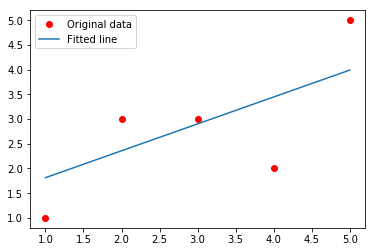

In [26]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.005
training_epochs = 500
display_step = 50

# Training Data
train_X = numpy.asarray([1.0,2.0,3.0,4.0,5.0])
train_Y = numpy.asarray([1.0,3.0,3.0,2.0,5.0])
n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Initializing the variables
init = tf.global_variables_initializer()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


Epoch: 0050 cost= 0.784862876 W= 0.139473 b= 2.78326
Epoch: 0100 cost= 0.751425922 W= 0.153411 b= 2.69379
Epoch: 0150 cost= 0.721888423 W= 0.175763 b= 2.61054
Epoch: 0200 cost= 0.694785237 W= 0.197642 b= 2.53087
Epoch: 0250 cost= 0.669892430 W= 0.218635 b= 2.45451
Epoch: 0300 cost= 0.647028565 W= 0.238758 b= 2.38133
Epoch: 0350 cost= 0.626029134 W= 0.258044 b= 2.31119
Epoch: 0400 cost= 0.606741071 W= 0.27653 b= 2.24396
Epoch: 0450 cost= 0.589025319 W= 0.294248 b= 2.17952
Epoch: 0500 cost= 0.572754145 W= 0.311231 b= 2.11775
Epoch: 0550 cost= 0.557809711 W= 0.327509 b= 2.05855
Epoch: 0600 cost= 0.544083953 W= 0.343111 b= 2.00181
Epoch: 0650 cost= 0.531477571 W= 0.358065 b= 1.94743
Epoch: 0700 cost= 0.519899547 W= 0.372398 b= 1.8953
Optimization Finished!
Training cost= 0.5199 W= 0.372398 b= 1.8953 



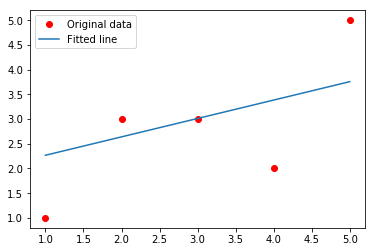

In [27]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.005
training_epochs = 700
display_step = 50

# Training Data
train_X = numpy.asarray([1.0,2.0,3.0,4.0,5.0])
train_Y = numpy.asarray([1.0,3.0,3.0,2.0,5.0])
n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Initializing the variables
init = tf.global_variables_initializer()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


Epoch: 0050 cost= 0.429608971 W= 0.81577 b= 0.123753
Epoch: 0100 cost= 0.416743994 W= 0.847984 b= 0.157612
Epoch: 0150 cost= 0.414575666 W= 0.843837 b= 0.180323
Epoch: 0200 cost= 0.412608057 W= 0.838094 b= 0.201598
Epoch: 0250 cost= 0.410799176 W= 0.832499 b= 0.221965
Epoch: 0300 cost= 0.409136206 W= 0.827132 b= 0.241485
Epoch: 0350 cost= 0.407607377 W= 0.821988 b= 0.260194
Epoch: 0400 cost= 0.406201780 W= 0.817057 b= 0.278126
Epoch: 0450 cost= 0.404909462 W= 0.812331 b= 0.295314
Epoch: 0500 cost= 0.403721184 W= 0.807801 b= 0.311788
Epoch: 0550 cost= 0.402628571 W= 0.80346 b= 0.327578
Epoch: 0600 cost= 0.401623875 W= 0.799298 b= 0.342713
Epoch: 0650 cost= 0.400700003 W= 0.79531 b= 0.357219
Epoch: 0700 cost= 0.399850458 W= 0.791487 b= 0.371122
Epoch: 0750 cost= 0.399069130 W= 0.787822 b= 0.384449
Epoch: 0800 cost= 0.398350626 W= 0.78431 b= 0.397222
Epoch: 0850 cost= 0.397689670 W= 0.780944 b= 0.409465
Epoch: 0900 cost= 0.397082001 W= 0.777718 b= 0.421199
Epoch: 0950 cost= 0.396522820 W=

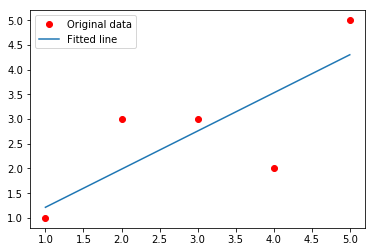

In [28]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.005
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([1.0,2.0,3.0,4.0,5.0])
train_Y = numpy.asarray([1.0,3.0,3.0,2.0,5.0])
n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Initializing the variables
init = tf.global_variables_initializer()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


Epoch: 0050 cost= 0.467797220 W= 0.844506 b= -0.0709066
Epoch: 0100 cost= 0.437543720 W= 0.896434 b= -0.0231482
Epoch: 0150 cost= 0.433645904 W= 0.891332 b= 0.0073618
Epoch: 0200 cost= 0.430136859 W= 0.883669 b= 0.0358337
Epoch: 0250 cost= 0.426912129 W= 0.876185 b= 0.0630844
Epoch: 0300 cost= 0.423948139 W= 0.869004 b= 0.0892016
Epoch: 0350 cost= 0.421223700 W= 0.862121 b= 0.114234
Epoch: 0400 cost= 0.418719292 W= 0.855524 b= 0.138227
Epoch: 0450 cost= 0.416417181 W= 0.849201 b= 0.161224
Epoch: 0500 cost= 0.414300859 W= 0.84314 b= 0.183266
Epoch: 0550 cost= 0.412355483 W= 0.837331 b= 0.204393
Epoch: 0600 cost= 0.410566956 W= 0.831763 b= 0.224642
Epoch: 0650 cost= 0.408922762 W= 0.826426 b= 0.244051
Epoch: 0700 cost= 0.407411158 W= 0.821312 b= 0.262654
Epoch: 0750 cost= 0.406021416 W= 0.816409 b= 0.280484
Epoch: 0800 cost= 0.404743522 W= 0.81171 b= 0.297573
Optimization Finished!
Training cost= 0.404744 W= 0.81171 b= 0.297573 



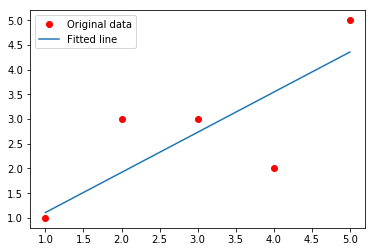

In [29]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.005
training_epochs = 800
display_step = 50

# Training Data
train_X = numpy.asarray([1.0,2.0,3.0,4.0,5.0])
train_Y = numpy.asarray([1.0,3.0,3.0,2.0,5.0])
n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Initializing the variables
init = tf.global_variables_initializer()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


Epoch: 0050 cost= 0.447894722 W= 0.518353 b= 1.4681
Epoch: 0100 cost= 0.412324846 W= 0.596748 b= 1.16249
Epoch: 0150 cost= 0.398521692 W= 0.647373 b= 0.965138
Epoch: 0200 cost= 0.393430710 W= 0.680066 b= 0.837691
Epoch: 0250 cost= 0.391737431 W= 0.701178 b= 0.755388
Epoch: 0300 cost= 0.391308784 W= 0.714812 b= 0.702239
Epoch: 0350 cost= 0.391309202 W= 0.723617 b= 0.667917
Epoch: 0400 cost= 0.391425073 W= 0.729303 b= 0.645751
Epoch: 0450 cost= 0.391548187 W= 0.732975 b= 0.631438
Epoch: 0500 cost= 0.391647846 W= 0.735346 b= 0.622194
Optimization Finished!
Training cost= 0.391648 W= 0.735346 b= 0.622194 



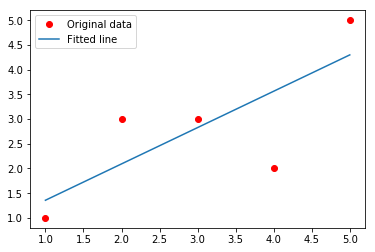

In [46]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.05
training_epochs = 500
display_step = 50

# Training Data
train_X = numpy.asarray([1.0,2.0,3.0,4.0,5.0])
train_Y = numpy.asarray([1.0,3.0,3.0,2.0,5.0])
n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Initializing the variables
init = tf.global_variables_initializer()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
